In [2]:
import io 
import numpy as np 
import random

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import re

# Import Dataset 

The dataset 'divina_commedia.txt' is imported, containing the text of Dante's Divine Comedy. The file includes additional lines that are not part of the original text but provide information about the author.

In [3]:
print('Opening file...')
path = "divina_commedia.txt"
with io.open(path, encoding='utf-8') as file:
    text = file.read().lower()

print("text length", len(text))
print()
print('\n\n\n\n\n', '***** first 1000 characters *****', '\n\n\n\n\n')
text[0:1000]

Opening file...
text length 558240






 ***** first 1000 characters ***** 







"inferno\n\n\n\ninferno: canto i\n\n\nnel mezzo del cammin di nostra vita\n  mi ritrovai per una selva oscura\n  che' la diritta via era smarrita.\n\nahi quanto a dir qual era e` cosa dura\n  esta selva selvaggia e aspra e forte\n  che nel pensier rinova la paura!\n\ntant'e` amara che poco e` piu` morte;\n  ma per trattar del ben ch'i' vi trovai,\n  diro` de l'altre cose ch'i' v'ho scorte.\n\nio non so ben ridir com'i' v'intrai,\n  tant'era pien di sonno a quel punto\n  che la verace via abbandonai.\n\nma poi ch'i' fui al pie` d'un colle giunto,\n  la` dove terminava quella valle\n  che m'avea di paura il cor compunto,\n\nguardai in alto, e vidi le sue spalle\n  vestite gia` de' raggi del pianeta\n  che mena dritto altrui per ogne calle.\n\nallor fu la paura un poco queta\n  che nel lago del cor m'era durata\n  la notte ch'i' passai con tanta pieta.\n\ne come quei che con lena affannata\n  uscito fuor del pelago a la riva\n  si volge a l'acqua perigliosa e guata,\n\ncosi` l'animo mio, 

In [4]:
# Remove information about the author
text = re.sub(r"(e-text courtesy progetto manuzio)", "", text, flags=re.DOTALL)

print("text length", len(text))
print()
print('\n\n\n\n\n', '***** first 1000 characters *****', '\n\n\n\n\n')
text[0:1000]

text length 558176






 ***** first 1000 characters ***** 







"inferno\n\n\n\ninferno: canto i\n\n\nnel mezzo del cammin di nostra vita\n  mi ritrovai per una selva oscura\n  che' la diritta via era smarrita.\n\nahi quanto a dir qual era e` cosa dura\n  esta selva selvaggia e aspra e forte\n  che nel pensier rinova la paura!\n\ntant'e` amara che poco e` piu` morte;\n  ma per trattar del ben ch'i' vi trovai,\n  diro` de l'altre cose ch'i' v'ho scorte.\n\nio non so ben ridir com'i' v'intrai,\n  tant'era pien di sonno a quel punto\n  che la verace via abbandonai.\n\nma poi ch'i' fui al pie` d'un colle giunto,\n  la` dove terminava quella valle\n  che m'avea di paura il cor compunto,\n\nguardai in alto, e vidi le sue spalle\n  vestite gia` de' raggi del pianeta\n  che mena dritto altrui per ogne calle.\n\nallor fu la paura un poco queta\n  che nel lago del cor m'era durata\n  la notte ch'i' passai con tanta pieta.\n\ne come quei che con lena affannata\n  uscito fuor del pelago a la riva\n  si volge a l'acqua perigliosa e guata,\n\ncosi` l'animo mio, 

# Preprocessing data

During the data preprocessing phase, the text is divided into individual *canti*, removing unnecessary titles to retain only the 100 *canti* from the Divine Comedy.

In [6]:
canti = re.split(r'(?<=\n)(inferno|purgatorio|paradiso):\s*canto\s*[ivxlcdm]+\n*', text)

canti = [canto.strip() for canto in canti if canto.strip() and canto.lower() not in ['inferno', 'purgatorio', 'paradiso']]

# The first element of 'cantos', namely 'Inferno', is removed from the list to obtain a list containing only the cantos. 
if canti[0].lower() in ['inferno', 'purgatorio', 'paradiso']:
    canti = canti[1:]

print("Number of cantos: ", len(canti))

# Print second canto
print(canti[1]) 

Number of cantos:  100
lo giorno se n'andava, e l'aere bruno
  toglieva li animai che sono in terra
  da le fatiche loro; e io sol uno

m'apparecchiava a sostener la guerra
  si` del cammino e si` de la pietate,
  che ritrarra` la mente che non erra.

o muse, o alto ingegno, or m'aiutate;
  o mente che scrivesti cio` ch'io vidi,
  qui si parra` la tua nobilitate.

io cominciai: <<poeta che mi guidi,
  guarda la mia virtu` s'ell'e` possente,
  prima ch'a l'alto passo tu mi fidi.

tu dici che di silvio il parente,
  corruttibile ancora, ad immortale
  secolo ando`, e fu sensibilmente.

pero`, se l'avversario d'ogne male
  cortese i fu, pensando l'alto effetto
  ch'uscir dovea di lui e 'l chi e 'l quale,

non pare indegno ad omo d'intelletto;
  ch'e' fu de l'alma roma e di suo impero
  ne l'empireo ciel per padre eletto:

la quale e 'l quale, a voler dir lo vero,
  fu stabilita per lo loco santo
  u' siede il successor del maggior piero.

per quest'andata onde li dai tu vanto,
  intese co

In [7]:
chars = sorted(list(set(text)))
print('total chars: ', len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(char_indices)
print(indices_char)

total chars:  40
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, ':': 10, ';': 11, '<': 12, '>': 13, '?': 14, '`': 15, 'a': 16, 'b': 17, 'c': 18, 'd': 19, 'e': 20, 'f': 21, 'g': 22, 'h': 23, 'i': 24, 'j': 25, 'l': 26, 'm': 27, 'n': 28, 'o': 29, 'p': 30, 'q': 31, 'r': 32, 's': 33, 't': 34, 'u': 35, 'v': 36, 'x': 37, 'y': 38, 'z': 39}
{0: '\n', 1: ' ', 2: '!', 3: '"', 4: "'", 5: '(', 6: ')', 7: ',', 8: '-', 9: '.', 10: ':', 11: ';', 12: '<', 13: '>', 14: '?', 15: '`', 16: 'a', 17: 'b', 18: 'c', 19: 'd', 20: 'e', 21: 'f', 22: 'g', 23: 'h', 24: 'i', 25: 'j', 26: 'l', 27: 'm', 28: 'n', 29: 'o', 30: 'p', 31: 'q', 32: 'r', 33: 's', 34: 't', 35: 'u', 36: 'v', 37: 'x', 38: 'y', 39: 'z'}


# Definition of functions

In [18]:
def generete_sequences(text, maxlen, step):
    sentences = []
    next_chars = []

    for i in range(0, len(text) - maxlen, step):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
    
    print('number of sequences: ', len(sentences))
    print(sentences[11])
    print(next_chars[11])
    
    return sentences, next_chars

In [17]:
def encode_sequences(sentences, next_chars, maxlen, chars, char_indices):
    x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
    y = np.zeros((len(sentences), len(chars)), dtype=bool)

    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1

    return x, y

In [9]:
import sys

def testAfterEpoch(epoch, _):
    print()
    print()
    print('***** Epoch: %d *****' % (epoch+1))
    start_index = random.randint(0, len(text)- maxlen - 1)

    generated = ''
    sentence = text[start_index : start_index + maxlen]
    generated = generated + sentence

    print('***** starting sentence *****') 
    print(sentence)
    print('*****************************')
    sys.stdout.write(generated)

    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1
        
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = indices_char[next_index]

        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


In [10]:
import matplotlib.pyplot as plt

def plot_performance(history):
    flg, ax = plt.subplots(1,2)
    flg.tight_layout()
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss')
    ax[0].plot(train_loss, label='Training Loss')
    ax[0].plot(val_loss, label='Validation Loss')
    ax[0].legend()
    
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].plot(train_acc, label='Training Accuracy')
    ax[1].plot(val_acc, label='Validation Accuracy')
    ax[1].legend()

    plt.show()

# Divide the sequence into training, validation and test

## Divide the sequence into training, validation and testing in an unbalanced way.

Si divide il dataset in training, validation e test andando a prendere in modo randomico i canti appena divisi. Al training si assegna il 70 percento dei canti, al validation il 20 e 10 per il test. 

Dato che i canti vengono mescolati all'inizo, questo potrebbe influire sui risultati per questo è stato definito che è un modo non bilanciato. 

Per questo primo addestramento è stata mantenuta l'architettura usata durante il laboratorio.  

In [11]:
random.shuffle(canti)

train_size = int(0.7 * len(canti))
val_size = int(0.2 * len(canti))
test_size = len(canti) - train_size - val_size

train_canti = canti[:train_size]
val_canti = canti[train_size:train_size + val_size]
test_canti = canti[train_size + val_size:]

print(f"Training set: {len(train_canti)} canti")
print(f"Validation set: {len(val_canti)} canti")
print(f"Test set: {len(test_canti)} canti")

Training set: 70 canti
Validation set: 20 canti
Test set: 10 canti


In [20]:
maxlen = 30 # chunk length
step = 3

sentences_train, next_chars_train = generete_sequences(''.join(train_canti), maxlen, step)
sentences_val, next_chars_val = generete_sequences(''.join(val_canti), maxlen, step)
sentences_test, next_chars_test = generete_sequences(''.join(test_canti), maxlen, step)

number of sequences:  129433
ma
  che noi fossimo al pie` d
e
number of sequences:  37121
 ci ferve l'ora sesta, e quest
o
number of sequences:  18586
rlando
  che la mia comedia ca
n


In [22]:
x_train, y_train = encode_sequences(sentences_train, next_chars_train, maxlen, chars, char_indices)
x_val, y_val = encode_sequences(sentences_val, next_chars_val, maxlen, chars, char_indices)
x_test, y_test = encode_sequences(sentences_test, next_chars_test, maxlen, chars, char_indices)

In [23]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (129433, 30, 40)
y_train shape: (129433, 40)
x_val shape: (37121, 30, 40)
y_val shape: (37121, 40)
x_test shape: (18586, 30, 40)
y_test shape: (18586, 40)


In [12]:

#x_train, y_train = prepare_sequences(''.join(train_canti), maxlen, step, chars, char_indices)
#x_val, y_val = prepare_sequences(''.join(val_canti), maxlen, step, chars, char_indices)
#x_test, y_test = prepare_sequences(''.join(test_canti), maxlen, step, chars, char_indices)



x_train shape: (129433, 30, 40)
y_train shape: (129433, 40)
x_val shape: (37121, 30, 40)
y_val shape: (37121, 40)
x_test shape: (18586, 30, 40)
y_test shape: (18586, 40)


Aggiungiamo all'architettura di rete anche la metrica di accuracy

In [13]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model.summary()

/Users/lucaperfetti/Desktop/università/Secondo Anno/Advanced ML/Assignement/Assignement-Advanced-ML/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [24]:
history = model.fit(x_train, y_train,
        validation_data=(x_val, y_val),
        batch_size = 2048, 
        epochs = 20, 
        callbacks = [print_callback], 
        )

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.4210 - loss: 1.7979

***** Epoch: 1 *****
***** starting sentence *****
vo` l'archian rubesto; e quel 
*****************************
vo` l'archian rubesto; e quel che si fiance.

e 'l con la mente a la mia perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perche' perch
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.4211 - loss: 1.7976 - val_accuracy: 0.4076 - val_loss: 1.8517
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.4392 - loss: 1.7404

***** Epoch: 2 *****
***** starting sentence *****
e mura
  piu` e piu` fossi cin
*****************************
e mura
  piu` e piu` fossi cine sere altre sere
  del

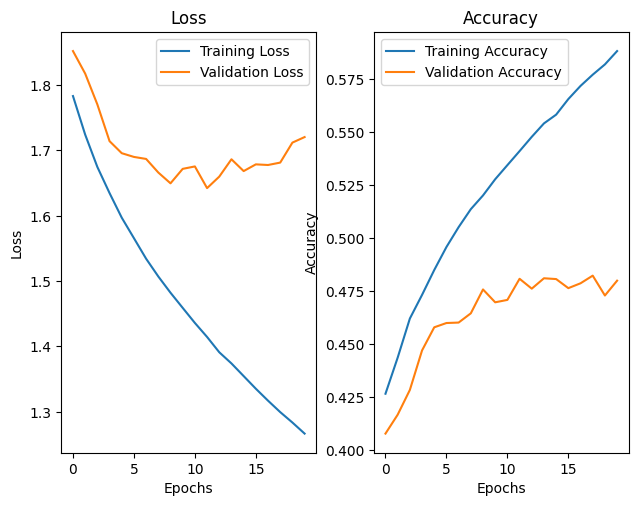

In [31]:
plot_performance(history)

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.694126009941101
Test accuracy 0.48934683203697205


## Divide the sequence into training, validation and testing in an balanced way.

In [32]:
# Pre processing dei dati andando a dividere i canti

cantiche = re.split(r'\n(inferno|purgatorio|paradiso)\n', text)

cantiche = [canto.strip() for canto in cantiche if canto.strip() and canto.lower() not in ['inferno', 'purgatorio', 'paradiso']]

print(cantiche)
print("Total cantiche: ", len(cantiche))
print(cantiche[1])

['inferno\n\n\n\ninferno: canto i\n\n\nnel mezzo del cammin di nostra vita\n  mi ritrovai per una selva oscura\n  che\' la diritta via era smarrita.\n\nahi quanto a dir qual era e` cosa dura\n  esta selva selvaggia e aspra e forte\n  che nel pensier rinova la paura!\n\ntant\'e` amara che poco e` piu` morte;\n  ma per trattar del ben ch\'i\' vi trovai,\n  diro` de l\'altre cose ch\'i\' v\'ho scorte.\n\nio non so ben ridir com\'i\' v\'intrai,\n  tant\'era pien di sonno a quel punto\n  che la verace via abbandonai.\n\nma poi ch\'i\' fui al pie` d\'un colle giunto,\n  la` dove terminava quella valle\n  che m\'avea di paura il cor compunto,\n\nguardai in alto, e vidi le sue spalle\n  vestite gia` de\' raggi del pianeta\n  che mena dritto altrui per ogne calle.\n\nallor fu la paura un poco queta\n  che nel lago del cor m\'era durata\n  la notte ch\'i\' passai con tanta pieta.\n\ne come quei che con lena affannata\n  uscito fuor del pelago a la riva\n  si volge a l\'acqua perigliosa e guata,\

In [33]:
# INFERNO
canti_inferno = re.split(r'(?<=\n)(inferno):\s*canto\s*[ivxlcdm]+\n*', cantiche[0])

canti_inferno = [canto.strip() for canto in canti_inferno if canto.strip() and canto.lower() not in ['inferno']]

# The first element of 'canti', namely 'Inferno', is removed from the list to obtain a list containing only the canti
if canti_inferno[0].lower() in ['inferno', 'purgatorio', 'paradiso']:
    canti_inferno = canti_inferno[1:]

print("Number of canti: ", len(canti_inferno))

train_size_inferno = int(0.7 * len(canti_inferno))
val_size_inferno = int(0.2 * len(canti_inferno))
test_size_inferno = len(canti_inferno) - train_size_inferno - val_size_inferno

train_inferno = canti_inferno[:train_size_inferno]
val_inferno = canti_inferno[train_size_inferno:train_size_inferno + val_size_inferno]
test_inferno = canti_inferno[train_size_inferno + val_size_inferno:]

print(f"Training set: {len(train_inferno)} canti")
print(f"Validation set: {len(val_inferno)} canti")
print(f"Test set: {len(test_inferno)} canti")

Number of canti:  34
Training set: 23 canti
Validation set: 6 canti
Test set: 5 canti


In [34]:
# PURGATORIO
canti_purgatorio = re.split(r'(?<=\n)(purgatorio):\s*canto\s*[ivxlcdm]+\n*', cantiche[1])

canti_purgatorio = [canto.strip() for canto in canti_purgatorio if canto.strip() and canto.lower() not in ['purgatorio']]

# The first element of 'canti', namely 'Inferno', is removed from the list to obtain a list containing only the canti 
if canti_purgatorio[0].lower() in ['purgatorio']:
    canti_purgatorio = canti_purgatorio[1:]

print("Number of canti: ", len(canti_purgatorio))

train_size_purgatorio = int(0.7 * len(canti_purgatorio))
val_size_purgatorio = int(0.2 * len(canti_purgatorio))
test_size_purgatorio = len(canti_purgatorio) - train_size_purgatorio - val_size_purgatorio

train_purgatorio = canti_purgatorio[:train_size_purgatorio]
val_purgatorio = canti_purgatorio[train_size_purgatorio:train_size_purgatorio + val_size_purgatorio]
test_purgatorio = canti_purgatorio[train_size_purgatorio + val_size_purgatorio:]

print(f"Training set: {len(train_purgatorio)} canti")
print(f"Validation set: {len(val_purgatorio)} canti")
print(f"Test set: {len(test_purgatorio)} canti")

Number of canti:  33
Training set: 23 canti
Validation set: 6 canti
Test set: 4 canti


In [35]:
# PARADISO
canti_paradiso = re.split(r'(?<=\n)(paradiso):\s*canto\s*[ivxlcdm]+\n*', cantiche[2])

canti_paradiso = [canto.strip() for canto in canti_paradiso if canto.strip() and canto.lower() not in ['paradiso']]

# The first element of 'canti', namely 'Inferno', is removed from the list to obtain a list containing only the canti. 
if canti_paradiso[0].lower() in ['paradiso']:
    canti_paradiso = canti_paradiso[1:]

print("Number of canti: ", len(canti_paradiso))

train_size_paradiso = int(0.7 * len(canti_paradiso))
val_size_paradiso = int(0.2 * len(canti_paradiso))
test_size_paradiso = len(canti_paradiso) - train_size_paradiso - val_size_paradiso

train_paradiso = canti_paradiso[:train_size_paradiso]
val_paradiso = canti_paradiso[train_size_paradiso:train_size_paradiso + val_size_paradiso]
test_paradiso = canti_paradiso[train_size_paradiso + val_size_paradiso:]

print(f"Training set: {len(train_paradiso)} canti")
print(f"Validation set: {len(val_paradiso)} canti")
print(f"Test set: {len(test_paradiso)} canti")

Number of canti:  33
Training set: 23 canti
Validation set: 6 canti
Test set: 4 canti


In [36]:
# Uniamo i canti suddivisi per ciascuna cantica nei rispettivi set finali
train_canti = train_inferno + train_purgatorio + train_paradiso
val_canti = val_inferno + val_purgatorio + val_paradiso
test_canti = test_inferno + test_purgatorio + test_paradiso

# Stampa la lunghezza dei set
print(f"Training set: {len(train_canti)} canti")
print(f"Validation set: {len(val_canti)} canti")
print(f"Test set: {len(test_canti)} canti")

Training set: 69 canti
Validation set: 18 canti
Test set: 13 canti


In [37]:
maxlen = 30 # chunk length
step = 3

sentences_train, next_chars_train = generete_sequences(''.join(train_canti), maxlen, step)
sentences_val, next_chars_val = generete_sequences(''.join(val_canti), maxlen, step)
sentences_test, next_chars_test = generete_sequences(''.join(test_canti), maxlen, step)

number of sequences:  126347
ta
  mi ritrovai per una selva
 
number of sequences:  33989
no
  che 'l sole i crin sotto 
l
number of sequences:  24811
a
  per semele` contra 'l sang
u


In [38]:
x_train, y_train = encode_sequences(sentences_train, next_chars_train, maxlen, chars, char_indices)
x_val, y_val = encode_sequences(sentences_val, next_chars_val, maxlen, chars, char_indices)
x_test, y_test = encode_sequences(sentences_test, next_chars_test, maxlen, chars, char_indices)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (126347, 30, 40)
y_train shape: (126347, 40)
x_val shape: (33989, 30, 40)
y_val shape: (33989, 40)
x_test shape: (24811, 30, 40)
y_test shape: (24811, 40)


In [39]:
model_b = Sequential()
model_b.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_b.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model_b.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model_b.summary()

/Users/lucaperfetti/Desktop/università/Secondo Anno/Advanced ML/Assignement/Assignement-Advanced-ML/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [41]:
history_b = model_b.fit(x_train, y_train,
        validation_data=(x_val, y_val),
        batch_size = 2048, 
        epochs = 20, 
        callbacks = [print_callback], 
        )

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.1676 - loss: 3.0526

***** Epoch: 1 *****
***** starting sentence *****
 infino al fine
  che i tre a'
*****************************
 infino al fine
  che i tre a' carie e 'l cielo altro si forse,
  che l'anima di suo veder non si solveglia
  di colui che si fa discender per lo suo fece sposse,
  che se non si fa di cio` che l'angende a la sua spera, e venne
  di come di suo fatto la terra e di solve stalla
  di cosi` son di cosi` son di tal altro a la sua spera.

tal era si` con li occhi con l'altro son arte son giono
  che l'anima di colui che si fa lar d
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 362ms/step - accuracy: 0.1682 - loss: 3.0488 - val_accuracy: 0.2876 - val_loss: 2.4149
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3035 - loss: 2.3174

***** Epoch: 2 *****
***** starting sentence *****
del dolente regno>>,
  rispuos
*****************************
del dolente regno>>,
  rispuose di quel che la sua so

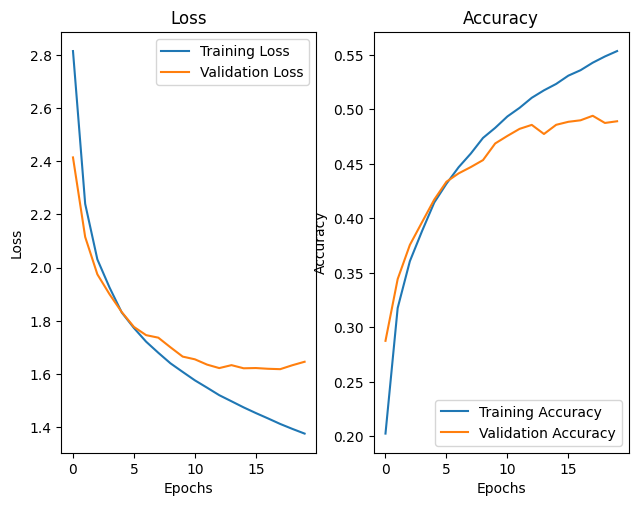

In [42]:
plot_performance(history_b)

In [43]:
score = model_b.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.6344280242919922
Test accuracy 0.4885736107826233


# Tune the chunk length

## Model 3 - maxlen 50

In [44]:
maxlen = 50 # chunk length
step = 3

sentences_train_50, next_chars_train_50 = generete_sequences(''.join(train_canti), maxlen, step)
sentences_val_50, next_chars_val_50 = generete_sequences(''.join(val_canti), maxlen, step)
sentences_test_50, next_chars_test_50 = generete_sequences(''.join(test_canti), maxlen, step)

number of sequences:  126341
ta
  mi ritrovai per una selva oscura
  che' la di
r
number of sequences:  33982
no
  che 'l sole i crin sotto l'aquario tempra
  e
 
number of sequences:  24804
a
  per semele` contra 'l sangue tebano,
  come mo
s


In [45]:
x_train_50, y_train_50 = encode_sequences(sentences_train_50, next_chars_train_50, maxlen, chars, char_indices)
x_val_50, y_val_50 = encode_sequences(sentences_val_50, next_chars_val_50, maxlen, chars, char_indices)
x_test_50, y_test_50 = encode_sequences(sentences_test_50, next_chars_test_50, maxlen, chars, char_indices)

print(f"x_train shape: {x_train_50.shape}")
print(f"y_train shape: {y_train_50.shape}")
print(f"x_val shape: {x_val_50.shape}")
print(f"y_val shape: {y_val_50.shape}")
print(f"x_test shape: {x_test_50.shape}")
print(f"y_test shape: {y_test_50.shape}")

x_train shape: (126341, 50, 40)
y_train shape: (126341, 40)
x_val shape: (33982, 50, 40)
y_val shape: (33982, 40)
x_test shape: (24804, 50, 40)
y_test shape: (24804, 40)


In [46]:
model3 = Sequential()
model3.add(LSTM(128, input_shape=(maxlen, len(chars))))
model3.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model3.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model3.summary()

/Users/lucaperfetti/Desktop/università/Secondo Anno/Advanced ML/Assignement/Assignement-Advanced-ML/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [48]:
history3 = model3.fit(x_train_50, y_train_50,
        validation_data=(x_val_50, y_val_50),
        batch_size = 2048, 
        epochs = 20, 
        callbacks = [print_callback], 
        )

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.1346 - loss: 3.4674

***** Epoch: 1 *****
***** starting sentence *****
cherza,

tanto pareva gia` inver' la sera
  essere
*****************************
cherza,

tanto pareva gia` inver' la sera
  essere in che l'anima di color che si fa larri a la sua facesta.

come a l'orizza si` con li occhi a tutto si` si face.

e quel che la sono a noi di sarette a la sua solana,
  come altra vi di suo veder non si salia di suo fece space
  che l'anima di colui che si fa discender in su la per sue ante,
  che se non si fa di cio` che l'anima di sua prova,
  che l'anima di colui che si fa discender e se si sp
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 484ms/step - accuracy: 0.1351 - loss: 3.4619 - val_accuracy: 0.2094 - val_loss: 2.7379
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.2487 - loss: 2.5799

***** Epoch: 2 *****
***** starting sentence *****
n le parole grame.

ma poscia ch'ebber colto lor v
***********************

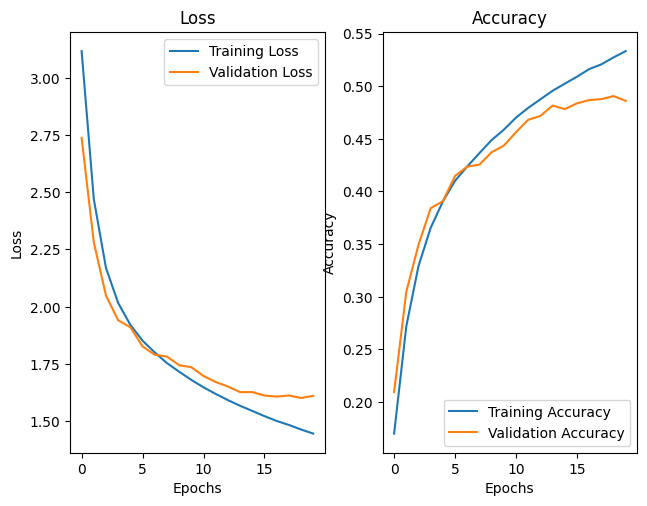

In [49]:
plot_performance(history3)

In [50]:
score = model3.evaluate(x_test_50, y_test_50, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.6177711486816406
Test accuracy 0.48109176754951477


## maxlen 20

In [51]:
maxlen = 20 # chunk length
step = 2

sentences_train_20, next_chars_train_20 = generete_sequences(''.join(train_canti), maxlen, step)
sentences_val_20, next_chars_val_20 = generete_sequences(''.join(val_canti), maxlen, step)
sentences_test_20, next_chars_test_20 = generete_sequences(''.join(test_canti), maxlen, step)

number of sequences:  189526
i nostra vita
  mi r
i
number of sequences:  50988
ovanetto anno
  che 
'
number of sequences:  37221
ra crucciata
  per s
e


In [52]:
x_train_20, y_train_20 = encode_sequences(sentences_train_20, next_chars_train_20, maxlen, chars, char_indices)
x_val_20, y_val_20 = encode_sequences(sentences_val_20, next_chars_val_20, maxlen, chars, char_indices)
x_test_20, y_test_20 = encode_sequences(sentences_test_20, next_chars_test_20, maxlen, chars, char_indices)

print(f"x_train shape: {x_train_20.shape}")
print(f"y_train shape: {y_train_20.shape}")
print(f"x_val shape: {x_val_20.shape}")
print(f"y_val shape: {y_val_20.shape}")
print(f"x_test shape: {x_test_20.shape}")
print(f"y_test shape: {y_test_20.shape}")

x_train shape: (189526, 20, 40)
y_train shape: (189526, 40)
x_val shape: (50988, 20, 40)
y_val shape: (50988, 40)
x_test shape: (37221, 20, 40)
y_test shape: (37221, 40)


In [53]:
model4 = Sequential()
model4.add(LSTM(128, input_shape=(maxlen, len(chars))))
model4.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model4.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [55]:
history4 = model4.fit(x_train_20, y_train_20,
        validation_data=(x_val_20, y_val_20),
        batch_size = 2048, 
        epochs = 20, 
        callbacks = [print_callback], 
        )

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.1817 - loss: 2.9281

***** Epoch: 1 *****
***** starting sentence *****
e nostra ragione
  p
*****************************
e nostra ragione
  per lo suo prese e vedeva
  di cosi` son di costorta,
  che non si facea in altri suoi di suo fatto fosse son giovi,
  che la sono a noi si spriata a cielo altro si forse
  che l'anima di suo si face.

e quel che la sua sona a rio discese.

per li turba la terra e di sole son di tanto sole,
  che non si facea in altri suoi di suo fatto fosse son giovi,
  che la sono a noi si spriata a cielo altro s
93/93 ━━━━━━━━━━━━━━━━━━━━ 23s 240ms/step - accuracy: 0.1823 - loss: 2.9247 - val_accuracy: 0.3273 - val_loss: 2.1789
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3403 - loss: 2.1152

***** Epoch: 2 *****
***** starting sentence *****
meno.

indi rendei l
*****************************
meno.

indi rendei la corpa s'accosta,
  per lo del corto fosse son discosi,
  che 

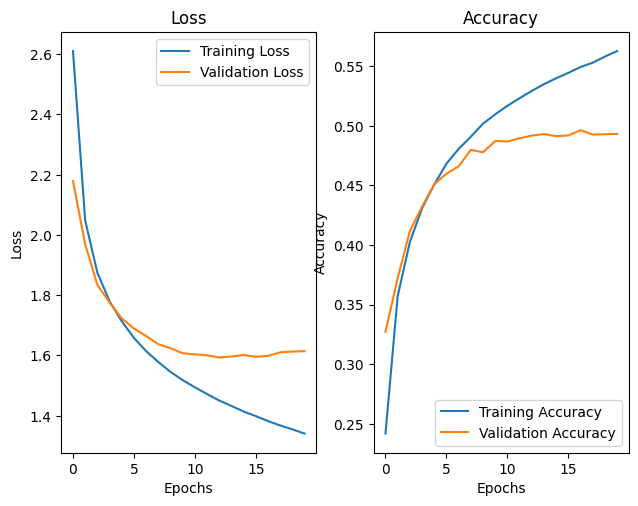

In [56]:
plot_performance(history4)

In [57]:
score = model4.evaluate(x_test_20, y_test_20, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.6096786260604858
Test accuracy 0.4950431287288666


## maxlen 80

In [58]:
maxlen = 80 # chunk length
step = 3

sentences_train_80, next_chars_train_80 = generete_sequences(''.join(train_canti), maxlen, step)
sentences_val_80, next_chars_val_80 = generete_sequences(''.join(val_canti), maxlen, step)
sentences_test_80, next_chars_test_80 = generete_sequences(''.join(test_canti), maxlen, step)

number of sequences:  126331
ta
  mi ritrovai per una selva oscura
  che' la diritta via era smarrita.

ahi q
u
number of sequences:  33972
no
  che 'l sole i crin sotto l'aquario tempra
  e gia` le notti al mezzo di` se
n
number of sequences:  24794
a
  per semele` contra 'l sangue tebano,
  come mostro` una e altra fiata,

atam
a


In [59]:
x_train_80, y_train_80 = encode_sequences(sentences_train_80, next_chars_train_80, maxlen, chars, char_indices)
x_val_80, y_val_80 = encode_sequences(sentences_val_80, next_chars_val_80, maxlen, chars, char_indices)
x_test_80, y_test_80 = encode_sequences(sentences_test_80, next_chars_test_80, maxlen, chars, char_indices)

print(f"x_train shape: {x_train_80.shape}")
print(f"y_train shape: {y_train_80.shape}")
print(f"x_val shape: {x_val_80.shape}")
print(f"y_val shape: {y_val_80.shape}")
print(f"x_test shape: {x_test_80.shape}")
print(f"y_test shape: {y_test_80.shape}")

x_train shape: (126331, 80, 40)
y_train shape: (126331, 40)
x_val shape: (33972, 80, 40)
y_val shape: (33972, 40)
x_test shape: (24794, 80, 40)
y_test shape: (24794, 40)


In [60]:
model5 = Sequential()
model5.add(LSTM(128, input_shape=(maxlen, len(chars))))
model5.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model5.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [62]:
# da rifare perché ho sbagliato model

history5 = model5.fit(x_train_80, y_train_80,
        validation_data=(x_val_80, y_val_80),
        batch_size = 2048, 
        epochs = 20, 
        callbacks = [print_callback], 
        )

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.5375 - loss: 1.4428

***** Epoch: 1 *****
***** starting sentence *****
o
  che, saziando di se', di se' asseta,

se' dimostrando di piu` alto tribo
  n
*****************************
o
  che, saziando di se', di se' asseta,

se' dimostrando di piu` alto tribo
  non si facea in su la sua contende con li altri come la sostra con gradi si face.

e quel che la sono a noi, che si fa discender e se si spondar la sua correate facea
  che fu tal ar e suo per lo merto serro son di la` dove si face in antito a la sua spera.

tal era si` con li occhi con li occhi suoi con l'altro si forse si` come sarai forse,
  che la sono a noi di sarette con li occhi suoi che la`
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 636ms/step - accuracy: 0.5375 - loss: 1.4429 - val_accuracy: 0.5052 - val_loss: 1.5470
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.5532 - loss: 1.3822

***** Epoch: 2 *****
***** starting sentence *****
rea lunga e gr

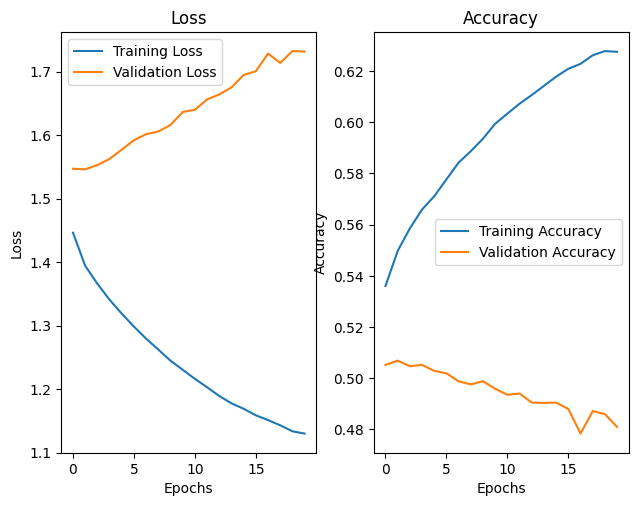

In [63]:
plot_performance(history5)

In [64]:
score = model5.evaluate(x_test_80, y_test_80, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 3.68584942817688
Test accuracy 0.02327175997197628
